In [1]:
using Plots, Random, DelimitedFiles, DataFrames

In [20]:
FLestimatesMF = readdlm("FLestimatesMF.txt")
FLestimatesStructured = readdlm("FLestimatesStructured.txt")
HMCestimates = readdlm("HMCestimates.txt")
;

In [21]:
Random.seed!(0);
#Generate data
T = 120

w1, w2, w3 = 0.1, 0.25, 1

x_data = [randn()]
y_data = [x_data[end]+0.1*randn()]
for t=2:25
    append!(x_data, x_data[end] + sqrt(1/w1)*randn())
    append!(y_data, x_data[end] + randn())
end
for t=26:75
    append!(x_data, x_data[end] + sqrt(1/w2)*randn())
    append!(y_data, x_data[end] + randn())
end
for t=76:T
    append!(x_data, x_data[end] + sqrt(1/w3)*randn())
    append!(y_data, x_data[end] + randn())
end

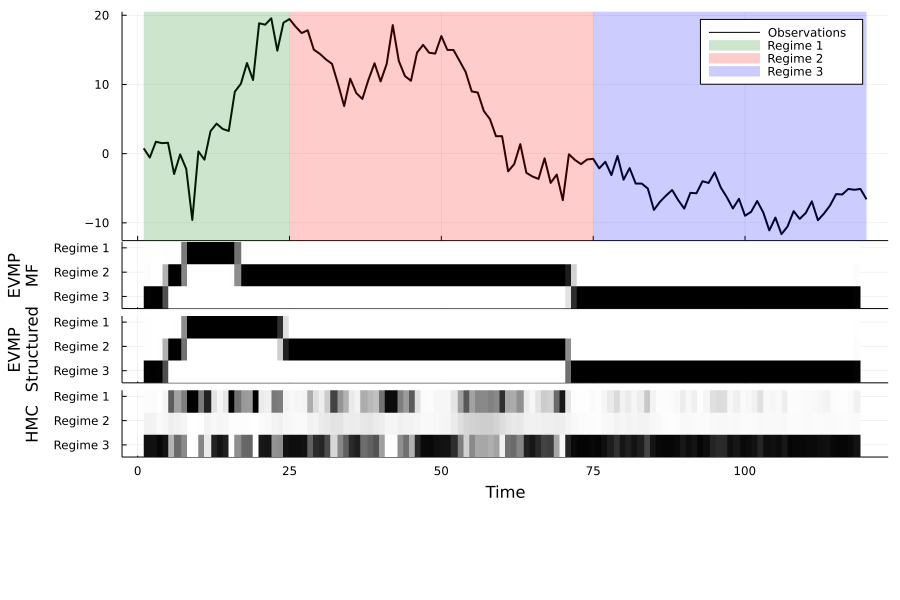

In [30]:
gr()
l = @layout [a ; b; c; d]
mm=Plots.PlotMeasures.mm
p1 = plot(1:T, y_data, w=2, labels = "Observations", legend=(:best), color=:black)
vspan!(p1,[1,25], color = :green, alpha = 0.2, labels = "Regime 1");
vspan!(p1,[25,75], color = :red, alpha = 0.2, labels = "Regime 2");
vspan!(p1,[75,T], color = :blue, alpha = 0.2, labels = "Regime 3");

p2 = plot(Gray.(FLestimatesMF), link=:x, xlabel="Time", ylabel="EVMP\nMF", top_margin=-34.0mm)
yticks!([2:4:10;], ["Regime 1", "Regime 2", "Regime 3"])

p3 = plot(Gray.(FLestimatesStructured), link=:x, xlabel="Time", ylabel="EVMP\nStructured", top_margin=-57.0mm)
yticks!([2:4:10;], ["Regime 1", "Regime 2", "Regime 3"])

p4 = plot(Gray.(HMCestimates), link=:x, xlabel="Time", ylabel="HMC", top_margin=-57.0mm)
yticks!([2:4:10;], ["Regime 1", "Regime 2", "Regime 3"])

p = plot(p1, p2, p3, p4, layout = l, size = (900, 600),left_margin = 5Plots.mm, bottom_margin = 5Plots.mm)

In [31]:
savefig(p,"SSSM-compare1.pdf")

In [32]:
F_mf = readdlm("FreeEnergyMF.txt")
F_structured = readdlm("FreeEnergyStructured.txt")
;

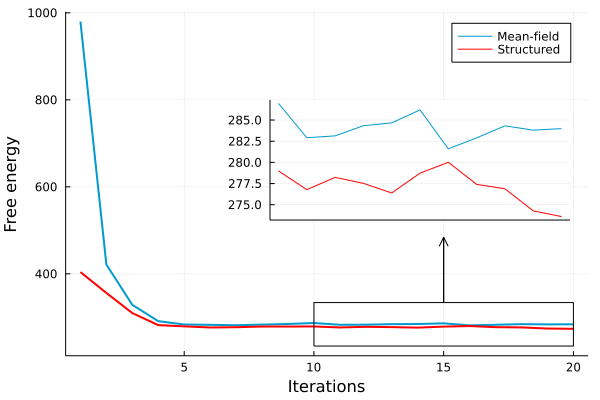

In [34]:
using StatsPlots, StatsPlots.PlotMeasures

function rectangle_from_coords(xb,yb,xt,yt)
    [
        xb  yb
        xt  yb
        xt  yt
        xb  yt
        xb  yb
        NaN NaN
    ]
end

plot(F_mf, label = "Mean-field", lw=2, color=:deepskyblue3)
plot!(F_structured, label = "Structured", lw=2, color=:red)
ylabel!("Free energy")
xlabel!("Iterations")

rects = rectangle_from_coords(length(F_mf)-10, F_mf[end]-50, length(F_mf), F_mf[end]+50)
plot!(rects[:,1], rects[:,2], color=:black, label=false)
quiver!([15],[F_mf[end]+50],quiver=([0],[150]),color=:black)

p = plot!(
    [F_mf[end-10:end],F_structured[end-10:end]],
    color=[:deepskyblue3 :red],
    inset = bbox(0.2, -0.1, 300px, 120px, :center),
    xticks = nothing,
    label=false,
    subplot = 2
)
p

In [35]:
savefig(p,"SSSM-compare2.pdf")